原文代码作者：https://github.com/wzyonggege/statistical-learning-method


# 第1章 统计学习方法概论

高斯于1823年在误差e1 ,… , en独立同分布的假定下,证明了最小二乘方法的一个最优性质: 在所有无偏的线性估计类中,最小二乘方法是其中方差最小的！

### 使用最小二乘法拟和曲线

对于数据$(x_i, y_i)(i=1, 2, 3...,m)$

拟合出函数$h(x)$

有误差，即残差：$r_i=h(x_i)-y_i$

此时L2范数(残差平方和)最小时，h(x) 和 y 相似度最高，更拟合

一般的H(x)为n次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ 使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

----

### 正则化

结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\frac{\lambda}{2}||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

举例：我们用目标函数$y=sin2{\pi}x$, 加上一个正太分布的噪音干扰，用多项式去拟合【例1.1 11页】

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
p = np.poly1d([2, 1, 1, 2, 3])
print(np.poly1d(p))
print(p(1))
print(type(p))

   4     3     2
2 x + 1 x + 1 x + 2 x + 3
9
<class 'numpy.lib.polynomial.poly1d'>


*ps: numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0$*

In [45]:
# 残差
def residuals_func(p, x, y):
    f = np.poly1d(p)
    ret = f(x) - y
    return ret

def residuals_func_regularization(p, x, y):
    regularization = 0.0001
    f = np.poly1d(p)
    ret = f(x) - y
    ret = np.append(ret, np.sqrt(0.5*regularization*np.square(p))) # L2范数作为正则化项
    return ret

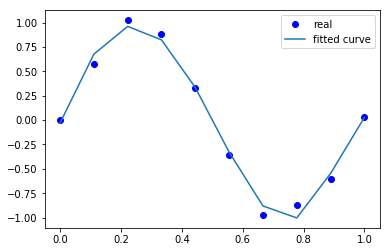

In [47]:
def residuals_func_regularization(p, x, y):
    regularization = 0.0001
    f = np.poly1d(p)
    ret = f(x) - y
    ret = np.append(ret, np.sqrt(0.5*regularization*np.square(p))) # L2范数作为正则化项
    return ret
x = np.linspace(0, 1, 10)
y_ = np.sin(2*np.pi*x)
y = [np.random.normal(0, 0.1)+y1 for y1 in y_]
p_init = np.random.rand(10)
p_lsq = leastsq(residuals_func_regularization, p_init, args=(x, y))
p=np.poly1d(p_lsq[0])
plt.plot(x, y,'bo', label='real')
plt.plot(x,p(x),label='fitted curve')
plt.legend()

In [41]:
x = np.linspace(0, 1, 10)
y_ = np.sin(2*np.pi*x)
y = [np.random.normal(0, 0.1)+y1 for y1 in y_]# 加上正态分布噪音

def fitting(M=0,regular=False):
    p_init = np.random.rand(M+1)# 随机初始化多项式参数
    if regular:
        p_lsq = leastsq(residuals_func_regularization, p_init, args=(x, y))
    else:
        p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])
    p=np.poly1d(p_lsq[0])

    plt.plot(x, y,'bo', label='real')
    plt.plot(x,p(x),label='fitted curve')
    plt.legend()
    return p_lsq

Fitting Parameters: [-3.02594938e+04  1.43406491e+05 -2.86661167e+05  3.13699115e+05
 -2.03901416e+05  7.97778288e+04 -1.80798790e+04  2.10545455e+03
 -8.66263720e+01 -1.14938918e-01]


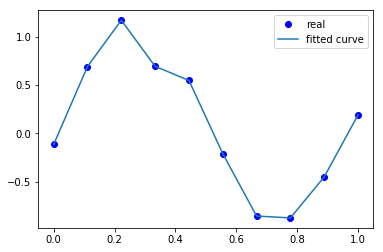

In [39]:
p_lsq_9 = fitting(M=9)#阶层不能大于散点数

Fitting Parameters: [ -2.36675726  -3.6427782   -1.42180479   3.3574306    8.2493622
   8.86738709  -0.65166535 -21.53840934   9.03191658   0.04279883]


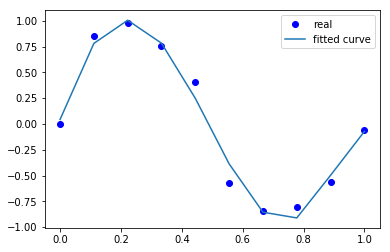

In [46]:
p_lsq_9 = fitting(M=9,regular=True)